<a href="https://colab.research.google.com/github/julianthr/ML_Assignments/blob/main/Final_Project/Music/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Reshape, Permute, GRU
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# mount to Google Drive 
drive.mount("/content/drive")

# save the most common part of file path
root_path = "/content/drive/My Drive/Audio_Mood_Classification"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os

In [ ]:
# load train, validation and test data

# MFCCs
file_names = ['X_train_mfcc30s.npy',
              'X_val_mfcc30s.npy',
              'X_test_mfcc30s.npy',
              'y_train_mfcc30s.npy',
              'y_val_mfcc30s.npy',
              'y_test_mfcc30s.npy']

folder = "train_test_data/mfcc30s"

for name in file_names:
    file_path = os.path.join(root_path, folder, name)
    var_name = name.split('.')[0]
    globals()[var_name] = np.load(file_path)

# path = root_path + "/train_test_data/mfcc30s/" + file_name

# X_train, X_val, X_test, y_train, y_val, y_test = [np.load(f) for f in file_names]


# # declare variables
# X_train_mfcc30s, X_val_mfcc30s, X_test_mfcc30s, y_train_mfcc30s, y_val_mfcc30s, y_test_mfcc30s = None, None, None, None, None, None

# files = [X_train_mfcc30s, X_val_mfcc30s, X_test_mfcc30s, y_train_mfcc30s, y_val_mfcc30s, y_test_mfcc30s]

# # load files
# for file, file_name in zip(files, file_names):
#     path = root_path + "/train_test_data/mfcc30s/" + file_name
#     file = np.load(path)

In [ ]:
print('X_train_mfcc30s:')
print(X_train_mfcc30s.shape)
# print(X_train_mfcc30s[:5])
print()
print('X_val_mfcc30s:')
print(X_val_mfcc30s.shape)
# print(X_val_mfcc30s[:5])
print()
print('X_test_mfcc30s:')
print(X_test_mfcc30s.shape)
# print(X_test_mfcc30s[:5])
print()
print("y_train_mfcc30s:")
print(y_train_mfcc30s.shape)
# print(y_train_mfcc30s[:5])
print()
print("y_val_mfcc30s:")
print(y_val_mfcc30s.shape)
# print(y_val_mfcc30s[:5])
print()
print("y_test_mfcc30s:")
print(y_test_mfcc30s.shape)
# print(y_test_mfcc30s[:5])


X_train_mfcc30s:
(46, 1292, 20, 1)

X_val_mfcc30s:
(16, 1292, 20, 1)

X_test_mfcc30s:
(16, 1292, 20, 1)

y_train_mfcc30s:
(46, 10)

y_val_mfcc30s:
(16, 10)

y_test_mfcc30s:
(16, 10)


In [ ]:
# define input shape and optimizer for all CNNs, build uniform compiler and fit functions
input_shape = (X_train_mfcc30s.shape[1], X_train_mfcc30s.shape[2], X_train_mfcc30s.shape[3])

optimizer = keras.optimizers.Adam(learning_rate= 0.001)

epochs = 30

def compiler(cnn, optimizer=optimizer):
  cnn.compile(optimizer=optimizer,
             loss = keras.losses.binary_crossentropy,
             metrics = [keras.metrics.AUC(name="auc"),
                        keras.metrics.Precision(name="precision"),
                        keras.metrics.Recall(name="recall")])

def fit_model(cnn):
  history = cnn.fit(X_train_mfcc30s, y_train_mfcc30s,
                    validation_data = (X_val_mfcc30s, y_val_mfcc30s),
                    batch_size=32, epochs = epochs)
  return history

def plot_training(history):
  # retrieve time series from history
  auc = history.history['auc']
  val_auc = history.history['val_auc']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(epochs)

  # Plot the figure for Training and Validation Accuracy
  plt.plot(epochs_range, auc, label='Training AUC')
  plt.plot(epochs_range, val_auc, label='Validation AUC')
  plt.legend(loc='lower right')
  plt.title('Training and Validation AUC')
  plt.show()

  # Plot the figure for Training and Validation Loss
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()
  


In [ ]:

# CNN 1: Shallow CNN
cnn1 = keras.models.Sequential([
    # 1st conv layer
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    # 2nd conv layer
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPool2D((2, 2), strides=(3, 2), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    # flatten
    keras.layers.Flatten(),

    # fully connected layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    
    # output layer
    keras.layers.Dense(10, activation = 'sigmoid', name='output')
])

In [ ]:
# compile model
compiler(cnn1)

# train model
cnn1_history = fit_model(cnn1)

Epoch 1/30
2/2 [==============================] - 3s 724ms/step - loss: 1.4724 - auc: 0.5423 - precision_17: 0.1347 - recall_17: 0.4483 - val_loss: 0.9893 - val_auc: 0.5573 - val_precision_17: 0.1442 - val_recall_17: 0.7500
Epoch 2/30
2/2 [==============================] - 1s 484ms/step - loss: 3.1922 - auc: 0.6027 - precision_17: 0.2955 - recall_17: 0.2241 - val_loss: 1.1609 - val_auc: 0.6007 - val_precision_17: 0.1458 - val_recall_17: 0.7000
Epoch 3/30
2/2 [==============================] - 1s 494ms/step - loss: 2.4283 - auc: 0.7294 - precision_17: 0.4219 - recall_17: 0.4655 - val_loss: 1.0647 - val_auc: 0.5723 - val_precision_17: 0.1548 - val_recall_17: 0.6500
Epoch 4/30
2/2 [==============================] - 2s 678ms/step - loss: 1.4156 - auc: 0.8060 - precision_17: 0.5211 - recall_17: 0.6379 - val_loss: 0.9697 - val_auc: 0.5748 - val_precision_17: 0.1500 - val_recall_17: 0.6000
Epoch 5/30
2/2 [==============================] - 2s 698ms/step - loss: 0.8623 - auc: 0.9035 - precision

In [ ]:
print("input shape: " + str(input_shape))
cnn1.summary()

input shape: (1292, 20, 1)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 1290, 18, 32)      320       
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 645, 9, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_97 (Bat  (None, 645, 9, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_98 (Dropout)        (None, 645, 9, 32)        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 644, 8, 64)        8256      
                                                                 
 max_pooling2d_90 (MaxPool

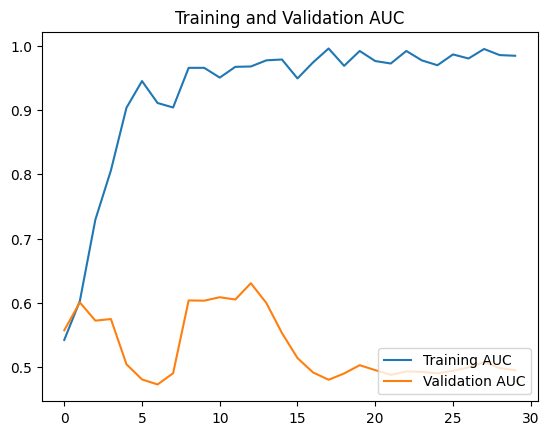

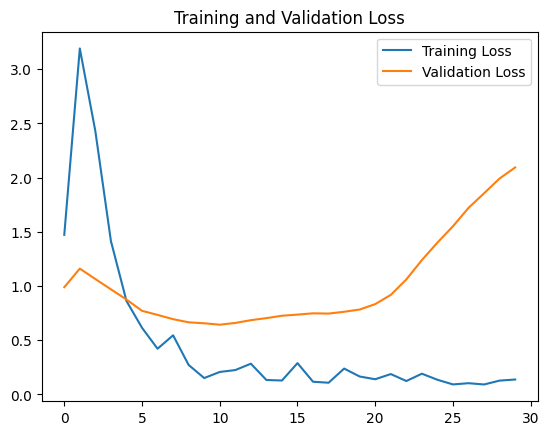

In [ ]:
# plot training
plot_training(cnn1_history)

In [ ]:
print(cnn1_history.history.keys())

dict_keys(['loss', 'auc_16', 'precision_16', 'recall_16', 'val_loss', 'val_auc_16', 'val_precision_16', 'val_recall_16'])


In [ ]:
cnn1_val_predictions = cnn1.predict(X_val_mfcc30s)
print(cnn1_val_predictions, y_val_mfcc30s)

1/1 [==============================] - 0s 194ms/step
[[0.1313266  0.5664763  0.29201782 0.99329334 0.83090836 0.99751604
  0.5146735  0.18552051 0.9821112  0.992685  ]
 [0.13073494 0.49553064 0.23441717 0.9890564  0.8341308  0.9955868
  0.5316149  0.11810479 0.97380114 0.9857727 ]
 [0.14481963 0.47472084 0.23982538 0.9913428  0.84352225 0.99598044
  0.49117213 0.15128139 0.97933894 0.9869345 ]
 [0.12206221 0.6880474  0.37732723 0.99665046 0.83530253 0.99819136
  0.45684233 0.3552849  0.9921912  0.9959113 ]
 [0.13648684 0.4807471  0.23802075 0.9881243  0.8039888  0.99574906
  0.5719466  0.13064063 0.9747387  0.9856059 ]
 [0.13304308 0.54164207 0.25714853 0.99228394 0.8480393  0.99631345
  0.5114993  0.15377328 0.98113114 0.989193  ]
 [0.10672591 0.54855794 0.3278965  0.9929365  0.84066087 0.997212
  0.5413012  0.13721251 0.9832939  0.9916937 ]
 [0.15667398 0.4143158  0.21469249 0.99500316 0.85202354 0.99664927
  0.5378079  0.13406374 0.98017555 0.9857041 ]
 [0.15570554 0.38074148 0.1724

In [ ]:
# CNN 2: deep CNN inspired by Yi et al 2020
cnn2 = keras.models.Sequential([
    # 1st conv layer
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape = input_shape),
    keras.layers.MaxPool2D((2,2), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    # 2nd conv layer
    keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
    keras.layers.MaxPool2D((2,2), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    # 3rd conv layer
    keras.layers.Conv2D(128, kernel_size=3,  activation="relu"),
    keras.layers.MaxPool2D((2,2), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    # 4th conv layer
    keras.layers.Conv2D(256, kernel_size=3, activation="relu"),
    keras.layers.MaxPool2D((2,2), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    # 5th conv layer
    keras.layers.Conv2D(512, kernel_size=3, activation="relu"),
    keras.layers.MaxPool2D((2,2), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    # 6th conv layer
    keras.layers.Conv2D(256, kernel_size=3, activation="relu"),
    keras.layers.MaxPool2D((2,2), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    # Flatten
    keras.layers.Flatten(),
    
    # Dense Layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),

    # Output layer
    keras.layers.Dense(10, activation ='sigmoid', name='output')
])

# adjust all parameters but Conv layer numbers
# do we need some special data structure in the flatten step?

In [ ]:
# compile model
compiler(cnn2, optimizer=keras.optimizers.legacy.Adam(learning_rate= 0.001))

# train model
cnn2_history = fit_model(cnn2)

Epoch 1/30
2/2 [==============================] - 14s 4s/step - loss: 0.8071 - auc_15: 0.6127 - precision_15: 0.1701 - recall_15: 0.5690 - val_loss: 0.6775 - val_auc_15: 0.6643 - val_precision_15: 0.1875 - val_recall_15: 0.4500
Epoch 2/30
2/2 [==============================] - 13s 4s/step - loss: 0.5941 - auc_15: 0.6584 - precision_15: 0.2742 - recall_15: 0.2931 - val_loss: 0.6958 - val_auc_15: 0.4446 - val_precision_15: 0.1077 - val_recall_15: 0.3500
Epoch 3/30
2/2 [==============================] - 13s 5s/step - loss: 0.5866 - auc_15: 0.7476 - precision_15: 0.3710 - recall_15: 0.3966 - val_loss: 0.6518 - val_auc_15: 0.5982 - val_precision_15: 0.1400 - val_recall_15: 0.3500
Epoch 4/30
2/2 [==============================] - 12s 5s/step - loss: 0.3761 - auc_15: 0.8394 - precision_15: 0.5660 - recall_15: 0.5172 - val_loss: 0.6596 - val_auc_15: 0.5166 - val_precision_15: 0.1250 - val_recall_15: 0.4000
Epoch 5/30
2/2 [==============================] - 11s 4s/step - loss: 0.2273 - auc_15: 0

In [ ]:
print("input shape: " + str(input_shape))
cnn2.summary()

input shape: (1292, 20, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 1292, 20, 32)      320       
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 646, 19, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_91 (Bat  (None, 646, 19, 32)      128       
 chNormalization)                                                
                                                                 
 dropout_91 (Dropout)        (None, 646, 19, 32)       0         
                                                                 
 conv2d_84 (Conv2D)          (None, 644, 17, 64)       18496     
                                                                 
 max_pooling2d_84 (MaxPool

In [ ]:
# plot training
plot_training(cnn2_history)

In [ ]:
# CNN 3 (FCN-4): FCN structure inspired by Choi et al. 2016
# input shape in paper: (96x1366x1)
# our input shape: (1292x40x1)


cnn3 = keras.models.Sequential([
    
    # 1st conv layer
    keras.layers.Conv2D(128, kernel_size=3, strides=(2,1), padding="same", activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D((4,1), strides=(2,2), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 2nd conv layer
    keras.layers.Conv2D(384, kernel_size=3, strides = (2,1), activation="relu"),
    keras.layers.MaxPool2D((5,2), strides=(2,2), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 3rd conv layer
    keras.layers.Conv2D(768, kernel_size=(3,1), strides = (2,1), activation="relu"),
    keras.layers.MaxPool2D((6,2), strides=(2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # 4th conv layer
    keras.layers.Conv2D(2024, kernel_size=(3,2), strides = (2,1), activation="relu"),
    keras.layers.MaxPool2D((7,1), strides=(2,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # Flatten (only necessary for dimensionality of output)
    keras.layers.Flatten(),

    # Output layer
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation ='sigmoid', name='output')
])

In [ ]:
# compile model
compiler(cnn3)

# train model
cnn3_history = fit_model(cnn3)

Epoch 1/30
2/2 [==============================] - 9s 3s/step - loss: 1.1139 - auc_7: 0.5027 - precision_7: 0.1202 - recall_7: 0.4828 - val_loss: 0.6861 - val_auc_7: 0.5266 - val_precision_7: 0.1600 - val_recall_7: 0.4000
Epoch 2/30
2/2 [==============================] - 7s 3s/step - loss: 1.1405 - auc_7: 0.6188 - precision_7: 0.1510 - recall_7: 0.6379 - val_loss: 0.6591 - val_auc_7: 0.6200 - val_precision_7: 0.1250 - val_recall_7: 0.2000
Epoch 3/30
2/2 [==============================] - 6s 2s/step - loss: 0.9261 - auc_7: 0.6454 - precision_7: 0.1806 - recall_7: 0.6724 - val_loss: 0.6388 - val_auc_7: 0.5291 - val_precision_7: 0.1111 - val_recall_7: 0.2000
Epoch 4/30
2/2 [==============================] - 6s 2s/step - loss: 0.8435 - auc_7: 0.7006 - precision_7: 0.1953 - recall_7: 0.7241 - val_loss: 0.6593 - val_auc_7: 0.5737 - val_precision_7: 0.1250 - val_recall_7: 0.2000
Epoch 5/30
2/2 [==============================] - 6s 2s/step - loss: 0.7771 - auc_7: 0.7518 - precision_7: 0.2070 - 

In [ ]:
print("input shape: " + str(input_shape))
cnn3.summary()

input shape: (1292, 20, 1)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 646, 20, 128)      1280      
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 323, 10, 128)     0         
 g2D)                                                            
                                                                 
 batch_normalization_72 (Bat  (None, 323, 10, 128)     512       
 chNormalization)                                                
                                                                 
 dropout_70 (Dropout)        (None, 323, 10, 128)      0         
                                                                 
 conv2d_66 (Conv2D)          (None, 161, 8, 384)       442752    
                                                                 
 max_pooling2d_66 (MaxPool

In [ ]:
# plot training
plot_training(cnn3_history)